<a href="https://colab.research.google.com/github/adrj67/Modelo_de_regresion_logistica_clasificacion/blob/miprim/3Copia_de_Pandas%2C_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulación de datos y primeros modelos de aprendizaje automático

## Pasos en un proyecto de aprendizaje automático

Los principales pasos que se deben seguir cuando uno comienza un proyecto de machine learning son:

1. Ver el _big picture_
1. Buscar _insights_ en los datos, explorándolos, visualizándolos
1. Preparar los datos para el modelo de machine learning
1. Seleccionar un modelo y entrenarlo
1. Seguir ajustando el modelo, buscar hiperparámetros
1. Presentar la solución

In [ ]:
import pandas as pd # para manipular datos
import numpy as np # para cálculos numéricos
import matplotlib.pyplot as plt # para visualizar

### ¿Qué es pandas?

Es la librería más conocida para manipular datos en Python. El formato más utilizado es el de Dataframe y se podría decir que es el Excel de Python.

Pandas también ofrece una serie de herramientas y métodos para manipular y analizar datos de manera eficiente. Esto incluye funciones para realizar operaciones estadísticas básicas, como la agregación y la visualización de datos

### Dataframes

La principal característica de Pandas es su estructura de datos de alto nivel, que se conoce como DataFrame. Un DataFrame de Pandas es similar a una hoja de cálculo en un programa como Microsoft Excel, pero tiene capacidades y funcionalidades adicionales que lo hacen muy útil para el análisis de datos.


### Datos de viviendas en California

In [ ]:
# cargo datos
datos = pd.read_csv("/content/sample_data/california_housing_train.csv")
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
type(datos)

pandas.core.frame.DataFrame

In [ ]:
datos.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
datos.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Cuestiones básicas de Pandas

In [ ]:
# obtener una columna

datos["median_house_value"]

In [ ]:
datos["median_income"]

In [ ]:
# operar una columna, por ejemplo sacar le promedio

datos["median_income"].mean()

In [ ]:
datos["median_house_value"].mean()

In [ ]:
# elevar al cuadrado valores

def cuadrado(x):
  return x**2

datos["median_house_value"].apply(cuadrado)

In [ ]:
# también se puede hacer

cuadrado(datos["median_house_value"])

In [ ]:
# elegir varias columna y tener una subtabla

datos[["total_rooms",	"total_bedrooms",	"population"]]

In [ ]:
# cómo obtener una fila

datos.loc[0] # por NOMBRE del índice

In [ ]:
# pero veamos que el índice y su orden pueden cambiar

datos.sort_values(by="total_bedrooms")

In [ ]:
datos.sort_values(by="total_bedrooms").iloc[0] # por posición

In [ ]:
datos.sort_values(by="total_bedrooms").loc[0] # por índice

In [ ]:
datos.sort_values(by="total_bedrooms").loc[16309]

In [ ]:
d = datos[["total_rooms",	"total_bedrooms",	"population"]].copy()
d

### Análisis exploratorio de datos y visualización

In [ ]:
datos.hist(bins=50, figsize=(20, 15))

In [ ]:
datos.plot(kind="scatter", x="longitude", y="latitude")

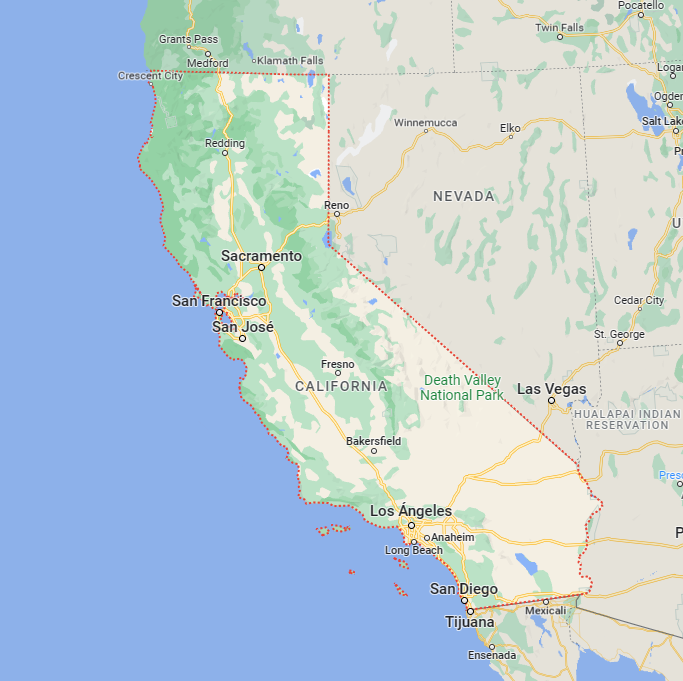

In [ ]:
datos.columns

In [ ]:
datos.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

In [ ]:
datos.plot(
    kind='scatter', # tipo de plot (este es de puntos)
    x='longitude', # columna a usar en el eje x
    y='latitude', # columna a usar en el eje y
    alpha=0.4, # transparencia de los puntos
    s=datos['population']/100, # diámetro de los puntos
    label='population', # etiqueta a mostrar (qué representan los puntos)
    figsize=(10, 7), # tamaño del gráfico
    c='median_house_value', # color del punto va a variar en función del median_house_value
    cmap=plt.get_cmap(name='jet'), # mapa de color
    colorbar=True # mostrar la referencia del mapa de color
)

In [ ]:
from pandas.plotting import scatter_matrix


atributos = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=datos[atributos], figsize=(12, 8))
plt.show()

In [ ]:
# veamos particularmente el median_income vs median_house_value

datos[atributos].corr()

In [ ]:
datos[atributos].corr()["median_house_value"]

#### Nuevas variables

In [ ]:
datos.head()

In [ ]:
# podemos hacer relaciones entre distintas columnas

# por ejemplo, cantidad de habitaciones totales por población
datos["rooms_population_ratio"] = datos["total_rooms"]/datos["population"]

datos["rooms_population_ratio"].describe()

In [ ]:
# cantidad de casas por poblacion
datos["households_population_ratio"] = datos["households"]/datos["population"]

# habitaciones por cantidad de casas
datos["rooms_households_ratio"] = datos["total_rooms"]/datos["households"]

# dormitorios por poblacion
datos["bedrooms_population_ratio"] = datos["total_bedrooms"] /datos["population"]

# dormitorios por cantidad de habitaciones
datos["bedrooms_rooms_ratio"] = datos["total_bedrooms"]/datos["total_rooms"]

datos

In [ ]:
datos.corr()["median_house_value"]

In [ ]:
import seaborn as sns

matriz_correlacion = datos.corr()


# armado del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
datos.plot(kind="scatter", x="population", y="households")

In [ ]:
datos.plot(kind="scatter", x="rooms_population_ratio", y="rooms_households_ratio")

In [ ]:
import seaborn as sns

matriz_correlacion = datos.corr()


# armado del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion[["median_house_value"]], annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


### Modelo de regresión lineal

Hay que elegir qué variable predecir y con qué entradas.

- Salida: precio de la casa
- Entrada: datos demográficos y geográficos de la casa

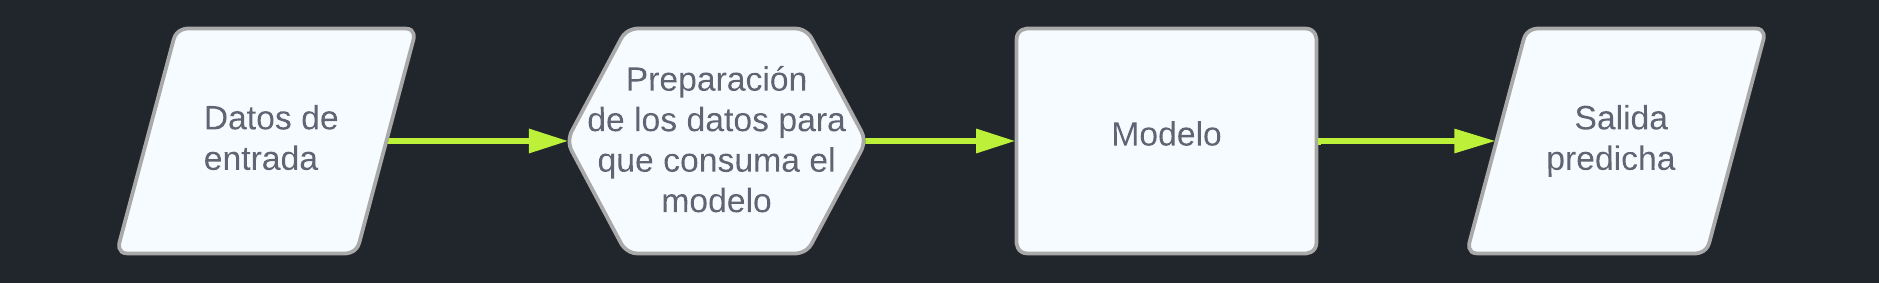

In [ ]:
# usemos "y" para la salida y "X" para la entrada

y = datos["median_house_value"]
X = datos.drop("median_house_value", axis=1) # todos menos mi variable objetivo

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# uso un escalador de minmax
scaler = MinMaxScaler()

# se buscan los máximos y mínimos del conjunto de entrenamiento y con eso
# se transforman los datos
X_train_scaled = scaler.fit_transform(X_train)

# aplicamos la transformación al de prueba
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
pd.DataFrame(X_train_scaled, columns=X.columns)

In [ ]:
# creo al modelo lineal
modelo_lineal = LinearRegression()

# entreno
modelo_lineal.fit(X_train_scaled, y_train)

In [ ]:
# hago pruebas con el test escalado
y_pred = modelo_lineal.predict(X_test_scaled)
y_pred

In [ ]:
y_test.values

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', label='y_test (Valores Reales)')
plt.scatter(range(len(y_test)), y_pred, alpha=0.5, color='red', label='y_pred (Predicciones del Modelo)')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Comparación entre y_test y y_pred')

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(range(30), y_test[:30], alpha=0.5, color='blue', label='y_test (Valores Reales)')
plt.scatter(range(30), y_pred[:30], alpha=0.5, color='red', label='y_pred (Predicciones del Modelo)')

plt.xlabel('Muestra')
plt.ylabel('Precios')
plt.title('Comparación entre y_test y y_pred')

plt.legend()
plt.show()

In [ ]:
datos_pred = pd.DataFrame(X_test, columns=datos.columns[:-1])
datos_pred["precios_predichos"] = y_pred
datos_pred.head()

In [ ]:
atributos = ['precios_predichos', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(frame=datos_pred[atributos], figsize=(12, 8))
plt.show()

Parecido al que nos daba en train con los datos reales

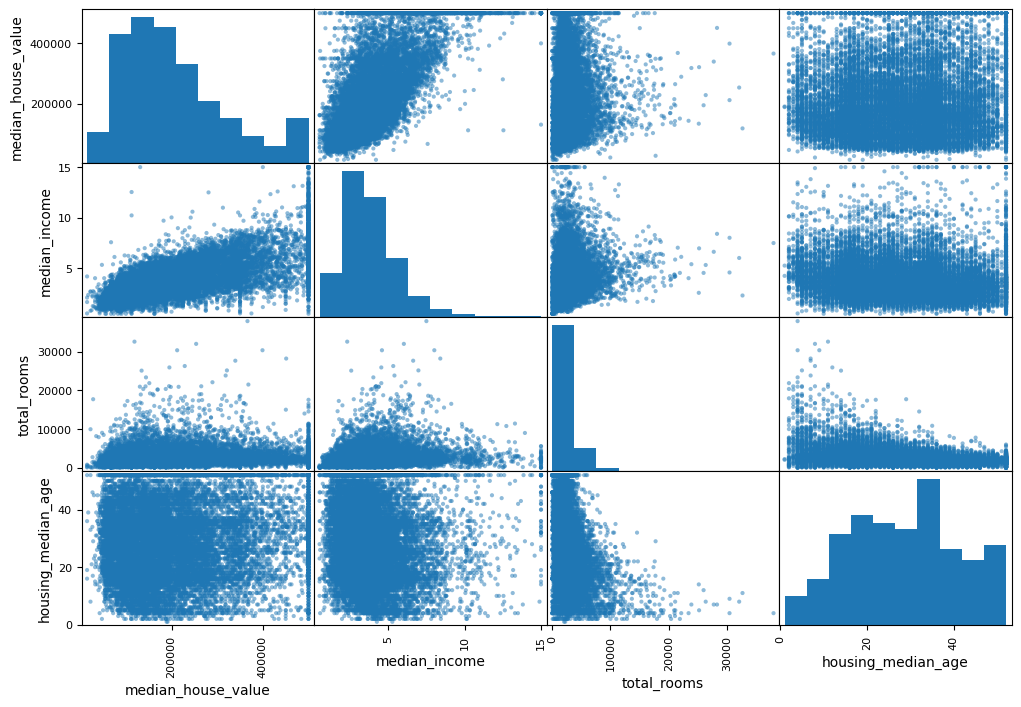

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

### Modelo de regresión logística (clasificación)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y.hist()

In [ ]:
y

In [ ]:
def categorias_precios(precio):
  if precio < 200_000:
    return 0 # bajo
  return 1 # alto

y_categoricos = y.apply(categorias_precios)

In [ ]:
y_categoricos

In [ ]:
y_categoricos.value_counts()

In [ ]:
y_categoricos.value_counts().plot(kind="bar")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categoricos, test_size=0.2, random_state=42)


# uso un escalador de minmax
scaler = MinMaxScaler()

# se buscan los máximos y mínimos del conjunto de entrenamiento y con eso
# se transforman los datos
X_train_scaled = scaler.fit_transform(X_train)

# aplicamos la transformación al de prueba
X_test_scaled = scaler.transform(X_test)

# creo al modelo logístico
modelo_logistico = LogisticRegression()

# entreno
modelo_logistico.fit(X_train_scaled, y_train)

In [ ]:
# hago pruebas con el test escalado
y_pred = modelo_logistico.predict(X_test_scaled)
y_pred

In [ ]:
y_test.values

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)